# 1. Data colection

In [1]:
from data.get_data import fetch_mt5_data_between_dates
from datetime import datetime, timedelta
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# ## Get data from trainning
# symbol = 'US500'
# end_date = datetime.now()
# start_date = end_date - timedelta(days=365*10)
# timeframe =timeframe = mt5.TIMEFRAME_M15
# data_signal = fetch_mt5_data_between_dates (symbol, timeframe, start_date, end_date)

In [3]:
## Get data from trainning
symbol = "US500"
end_date = datetime.now()
start_date = end_date - timedelta(days=365*3)
timeframe =timeframe = mt5.TIMEFRAME_H1
df_1h = fetch_mt5_data_between_dates (symbol, timeframe, start_date, end_date)
df_1h.head()

Fetching US500 from 2022-09-15 22:11:22.103279 to 2025-09-14 22:11:22.103279


,time,open,high,low,close,tick_volume,spread,real_volume
0,2022-09-15 16:00:00,3910.61,3923.07,3903.62,3923.07,2244,80,0
1,2022-09-15 17:00:00,3923.31,3947.04,3923.13,3930.38,2290,82,0
2,2022-09-15 18:00:00,3930.57,3930.81,3908.88,3911.54,2187,81,0
3,2022-09-15 19:00:00,3911.35,3912.80,3889.24,3904.36,2881,85,0
4,2022-09-15 22:00:00,3880.15,3882.19,3877.68,3881.85,461,92,0


In [4]:
df_1h['time'] = pd.to_datetime (df_1h['time'])
df_1h = df_1h.set_index('time')

In [5]:
## Get data from trainning
symbol = "US500"
end_date = datetime.now()
start_date = end_date - timedelta(days=365*3)
timeframe =timeframe = mt5.TIMEFRAME_H4
df_4h = fetch_mt5_data_between_dates (symbol, timeframe, start_date, end_date)
df_4h .head()

Fetching US500 from 2022-09-15 22:11:22.214022 to 2025-09-14 22:11:22.214022


,time,open,high,low,close,tick_volume,spread,real_volume
0,2022-09-15 16:00:00,3910.61,3947.04,3889.24,3904.36,9602,80,0
1,2022-09-15 20:00:00,3880.15,3882.19,3873.99,3878.55,1395,74,0
2,2022-09-16 00:00:00,3878.48,3883.88,3875.50,3875.51,4068,82,0
3,2022-09-16 04:00:00,3875.72,3878.74,3866.80,3871.22,5365,82,0
4,2022-09-16 08:00:00,3871.41,3878.28,3862.55,3871.81,5891,72,0


In [6]:
df_4h['time'] = pd.to_datetime( df_4h['time'])
df_4h = df_4h.set_index('time')

## Makert regime using 

In [78]:
from market_regime.regime import MarketRegime 

In [79]:
regime_detector = MarketRegime(df_4h)

In [80]:
from collections import Counter

def smooth_by_interval(data, interval_size):
    """
    Replace each interval of data with its dominant value.

    :param data: List of numeric regimes (e.g., 0, 1, 2)
    :param interval_size: Number of points per interval
    :return: List of smoothed data
    """
    intervals = [data[i:i+interval_size] for i in range(0, len(data), interval_size)]
    smoothed_data = []
    for interval in intervals:
        dominant = Counter(interval).most_common(1)[0][0]  # find dominant regime
        smoothed_data.extend([dominant] * len(interval))
    return smoothed_data

## HMM

In [81]:
window_size = 4
hmm = regime_detector._train_HMM (window_size )

Model is not converging.  Current: 42752.54087721836 is not greater than 42757.729463932235. Delta is -5.188586713877157


In [82]:
df_h4_hmm = regime_detector._regime_HMM  (window_size, df_4h, hmm)

In [83]:
# df_h4_hmm['regime'] = smooth_by_interval(df_h4_hmm['regime'],interval_size = 4)

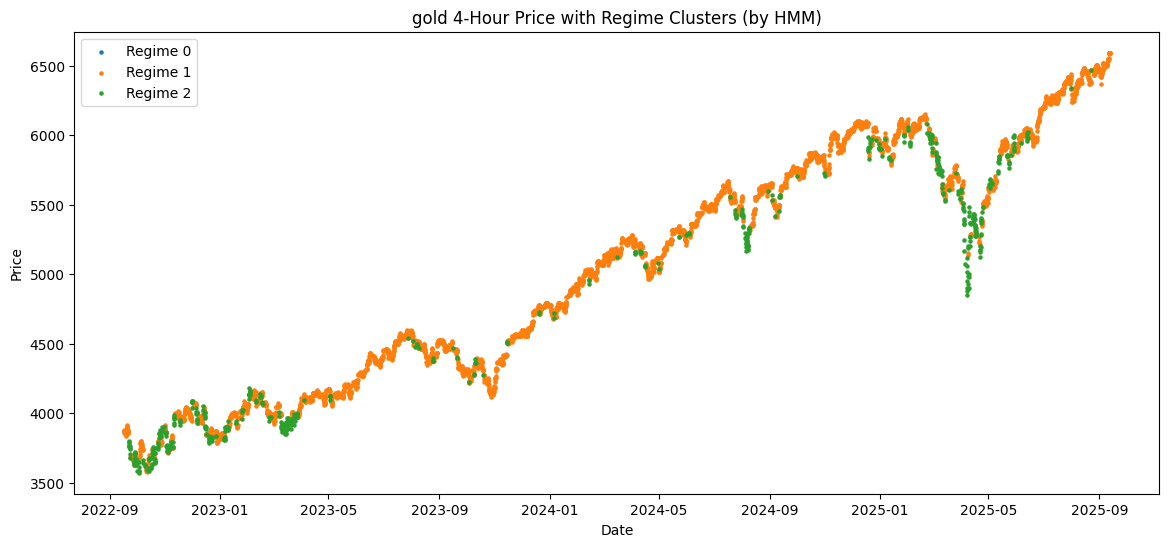

In [84]:
plt.figure(figsize=(14, 6))
# plt.plot(df_hmm['time'], df_hmm['close'], color='gray', label='Close Price')
for regime in sorted(df_h4_hmm ['regime'].unique()):
    mask = df_h4_hmm ['regime'] == regime
    plt.scatter(df_h4_hmm .index[mask],df_h4_hmm ['close'][mask],
                label=f"Regime {regime}", s=5)
plt.legend()
plt.title("gold 4-Hour Price with Regime Clusters (by HMM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Sclop clustering


In [85]:
df_4h

,open,high,low,close,tick_volume,spread,real_volume,EMA34,EMA55,EMA84,converged
time,,,,,,,,,,,
2022-09-15 16:00:00,3910.61,3947.04,3889.24,3904.36,9602,80,0,3904.360000,3904.360000,3904.360000,True
2022-09-15 20:00:00,3880.15,3882.19,3873.99,3878.55,1395,74,0,3902.885143,3903.438214,3903.752706,True
2022-09-16 00:00:00,3878.48,3883.88,3875.50,3875.51,4068,82,0,3901.320849,3902.440778,3903.088172,True
2022-09-16 04:00:00,3875.72,3878.74,3866.80,3871.22,5365,82,0,3899.600800,3901.325750,3902.338332,True
2022-09-16 08:00:00,3871.41,3878.28,3862.55,3871.81,5891,72,0,3898.012755,3900.271616,3901.620019,True
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-12 04:00:00,6591.84,6595.35,6584.22,6585.20,3923,29,0,6533.638884,6514.530536,6495.853659,True
2025-09-12 08:00:00,6585.04,6590.04,6576.19,6589.87,6035,29,0,6536.852091,6517.221231,6498.065808,True
2025-09-12 12:00:00,6589.65,6599.08,6585.12,6590.42,20366,21,0,6539.913114,6519.835473,6500.238848,True


In [86]:
window_size = 2
window_size_rolling = 34
slope_cluster = regime_detector._train_SlopeCluster(window_size,
                                            window_size_rolling
                                            )


In [87]:
df_4h_slope = regime_detector._regime_SlopeCluster(
                             window_size,
                             window_size_rolling,
                             df_4h,
                             slope_cluster)

In [88]:
df_4h_slope ['regime'] = smooth_by_interval(df_4h_slope ['regime'], 4)

In [89]:
df_4h_slope .head()

,open,high,low,close,tick_volume,spread,real_volume,EMA34,EMA55,EMA84,converged,ma34,slope,regime
0,3710.40,3725.41,3676.40,3681.97,14125,74,0,3816.406491,3840.392106,3857.911758,True,3833.073529,-5.740147,2.0
1,3681.72,3693.80,3646.21,3688.77,12393,77,0,3809.112977,3834.977030,3853.931952,True,3827.581176,-5.637059,2.0
2,3697.78,3698.55,3682.25,3688.11,2620,77,0,3802.198521,3829.731779,3850.030259,True,3822.195588,-5.438971,2.0
3,3687.79,3695.69,3666.30,3675.59,8944,83,0,3794.963749,3824.226716,3845.925782,True,3816.424412,-5.578382,2.0
4,3675.44,3704.43,3659.29,3685.36,9590,85,0,3788.700677,3819.267190,3842.147764,True,3811.301471,-5.447059,2.0


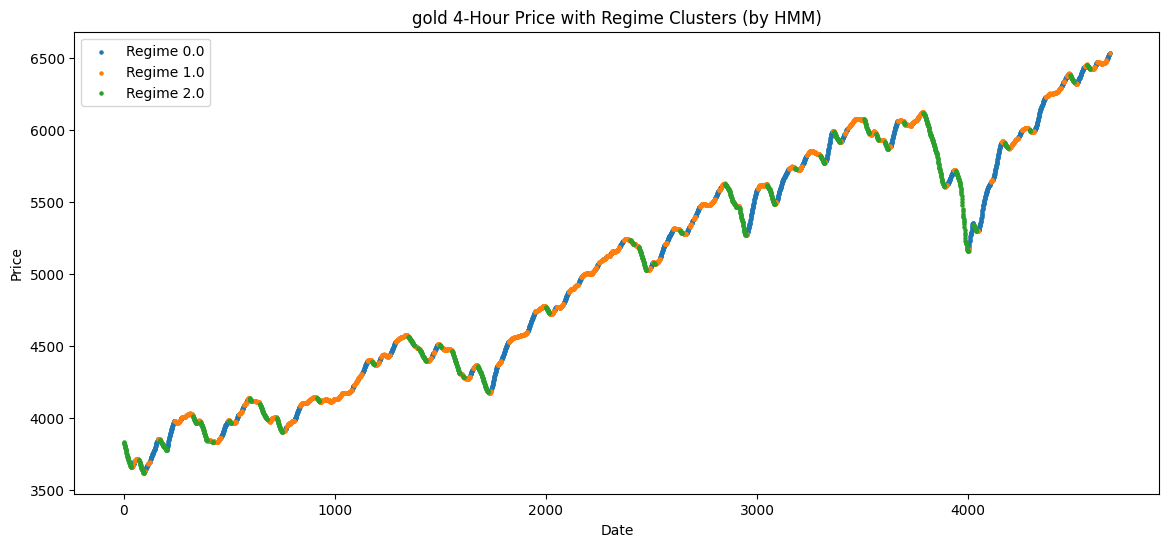

In [90]:
plt.figure(figsize=(14, 6))
# plt.plot(df_hmm['time'], df_hmm['close'], color='gray', label='Close Price')
for regime in sorted(df_4h_slope ['regime'].unique()):
    mask = df_4h_slope['regime'] == regime
    plt.scatter(df_4h_slope .index[mask],df_4h_slope['ma34'][mask],
                label=f"Regime {regime}", s=5)
plt.legend()
plt.title("gold 4-Hour Price with Regime Clusters (by HMM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Coilde_spring

In [91]:
from swing_signal.ma_convergence import CoiledSpringEMAConvergenceStrategy, Dip_Tip_MA_Convergence

In [92]:
coile_spring = CoiledSpringEMAConvergenceStrategy()

In [93]:
df_1h, df_4h = coile_spring.detect_convergence(df_1h, df_4h) 

In [94]:
signals = coile_spring.generate_signals (df_1h,df_4h)

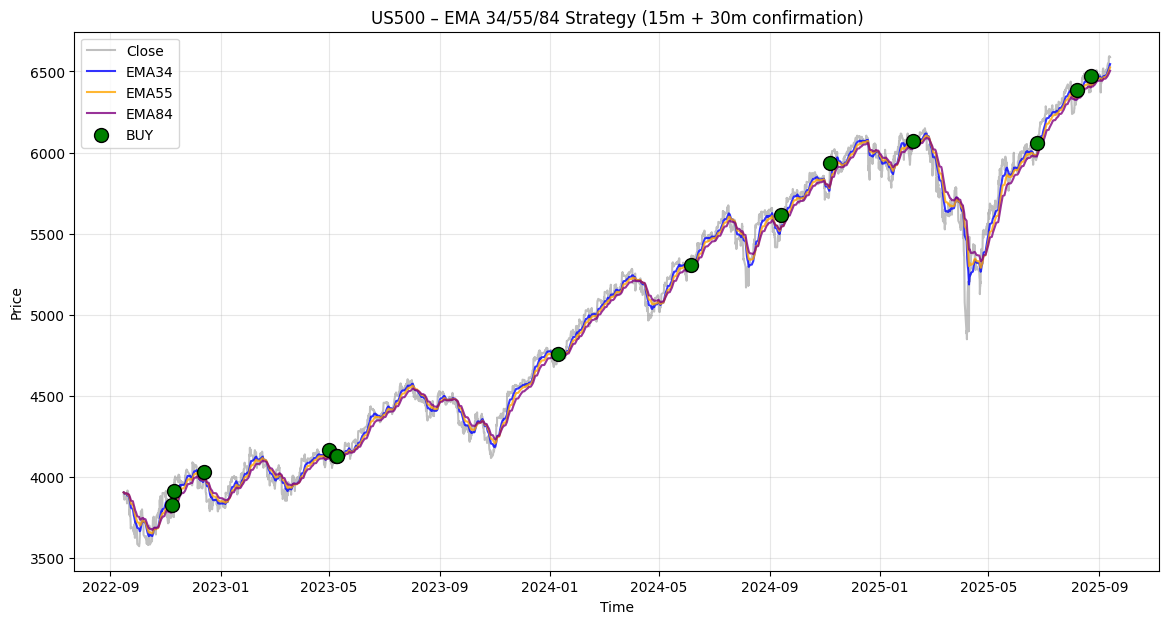

In [95]:
# --------- VẼ BIỂU ĐỒ ---------
plt.figure(figsize=(14, 7))
plt.plot(df_1h.index, df_4h['close'], label='Close', color='gray', alpha=0.5)
plt.plot(df_1h.index, df_4h['EMA34'], label='EMA34', color='blue', alpha=0.8)
plt.plot(df_1h.index, df_4h['EMA55'], label='EMA55', color='orange', alpha=0.8)
plt.plot(df_1h.index, df_4h['EMA84'], label='EMA84', color='purple', alpha=0.8)

# Vẽ tín hiệu BUY/SELL
for t, sig, price in signals:
    color = 'green' if sig == 'BUY' else 'red'
    plt.scatter(t, price, color=color, s=100, label=sig if t == signals[0][0] else "",
                edgecolors='black', zorder=5)

plt.title(f"{symbol} – EMA 34/55/84 Strategy (15m + 30m confirmation)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Reinforcement_Learning